# # 모두의 파이썬 데이터분석 - 1

## 1. 서울 기온 데이터 분석하기
### 1) 헤더 받아오기
<br> 일반적으로 데이터에는 실 데이터가 아닌 헤더가 존재한다. 데이터만을 읽어들이기 위해 next 함수를 이용했다. next() 함수는 현재 데이터 행을 읽어오면서 다음 행으로 이동시키는 함수이다.

In [3]:
import csv
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
# print(data)
header = next(data)
print(header)

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


### 2) 전체 데이터 읽어오기
본 예제에서는 5줄만 읽어오는 것으로 수정했다.

In [60]:
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
next(data)

lines = []
for row in range(5):
    print(next(data))

['1907-10-01', '108', '13.5', '7.9', '20.7']
['1907-10-02', '108', '16.2', '7.9', '22']
['1907-10-03', '108', '16.2', '13.1', '21.3']
['1907-10-04', '108', '16.5', '11.2', '22']
['1907-10-05', '108', '17.6', '10.9', '25.4']


### 3) 서울시 최고 기온 구하기
최고 기온을 구하기에 앞서, ''작은 따옴표로 둘러쌓여 있는 온도를 숫자 형태만 남긴다.

In [65]:
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)
count = 0;

for row in data:
    if row[-1]=='':
        row[-1] = float(row[-1]) # 기온을 실수로 변환
        print(row[-1])
        count +=1; 

        if count==5:
            break;

ValueError: could not convert string to float: 

값이 없는 부분에서 String -> float 형 변환이 불가능하다는 에러가 발생한다. 이 경우 아래처럼 값을 처리해주고 변환을 계속한다.

In [69]:
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)
count = 0;

for row in data:
    if row[-1] == '':
        row[-1] = -999
    row[-1] = float(row[-1]) # 최고 기온을 실수로 변환
    print(row[-1])
    count +=1; 

    if count==5:
        break;

20.7
22.0
21.3
22.0
25.4


무사히 기온을 변환했으니 서울시의 최고 기온을 구해보자. 최고 기온은 가장 작은수로 두고, 날짜는 비워둔 뒤, 데이터의 첫 행 부터 마지막 행까지 비교하며 최고 온도를 바꾼다. 아래는 최고 온도인 날짜까지 출력하는 코드이다.

In [100]:
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)
max_temp = -999.0
max_date = ''
for row in data:
    
    if row[-1] == '':
        row[-1] = -999
    
    row[-1] = float(row[-1])
    
    if max_temp < row[-1]:
        max_temp = row[-1]
        max_date = row[0]

print(max_date)
print(max_temp)

1994-07-24
38.4


## 2. 파이썬과 데이터 시각화
### 1) 기본 그래프 그리기

#### (1) 그래프 옵션
plt.title()    # 제목 정하기 <br> 
plt.plot()     # 그래프 그리기 <br>
plt.legend()   # 범례 표시하기 <br>
plt.plot()
 - color: 색상
 - label: 범례에 표시될 라벨명
 - linestyle(ls): 라인 스타일 ('--', ':' 등)
 - 마커모양: 
    - . 점모양 <br>
    - ^삼각형 모양 <br>

만약 색상, 선, 마커 모양을 동시에 정하고 싶을 때는 <색상><마커모양><선모양>순으로 코드를 작성해야 한다. (plt.plot([1,2,3,4], 'r.--')

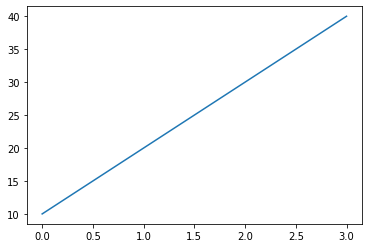

In [101]:
import matplotlib.pyplot as plt
plt.plot([10, 20, 30, 40])
plt.show()

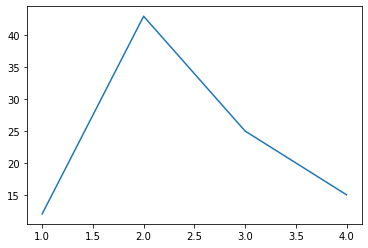

In [102]:
plt.plot([1, 2, 3, 4], [12, 43, 25, 15])
plt.show()

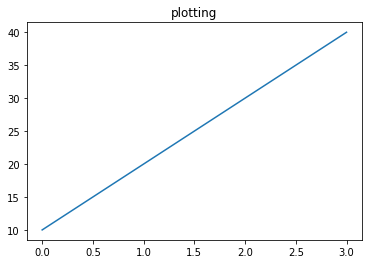

In [103]:
plt.title('plotting')
plt.plot([10, 20, 30, 40])
plt.show()

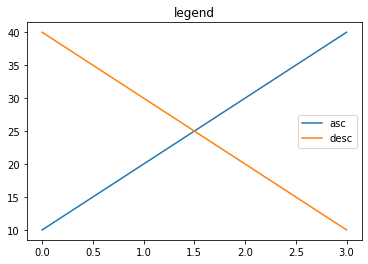

In [104]:
plt.title('legend')
plt.plot([10, 20, 30, 40], label='asc')
plt.plot([40, 30, 20, 10], label='desc')
plt.legend()
plt.show()

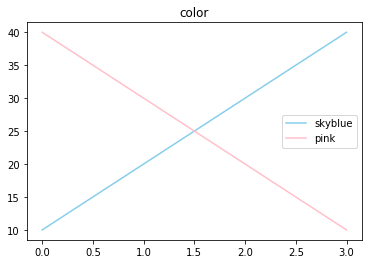

In [105]:
plt.title('color')
plt.plot([10, 20, 30, 40], color='skyblue', label='skyblue')
plt.plot([40, 30, 20, 10], 'pink', label='pink')
plt.legend()
plt.show()

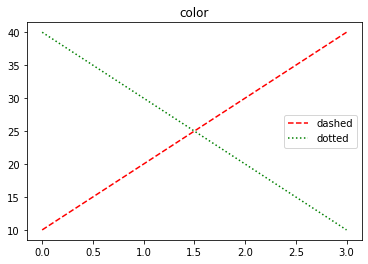

In [106]:
plt.title('color')
plt.plot([10, 20, 30, 40], color='r', linestyle='--', label='dashed')
plt.plot([40, 30, 20, 10], color='g', ls=':', label='dotted')
plt.legend()
plt.show()

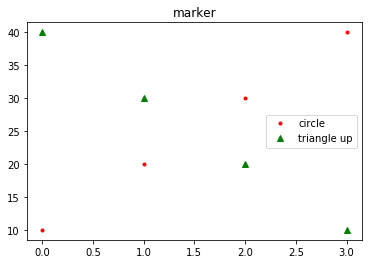

In [107]:
plt.title('marker')
plt.plot([10, 20, 30, 40], 'r.', label='circle')
plt.plot([40, 30, 20, 10], 'g^', label='triangle up')
plt.legend()
plt.show()

### 2) 내 생일의 기온 변화를 그래프로 그리기
그래프를 그리기 전에, 아까 가져왔던 기온 데이터를 저장한다.

In [70]:
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)
result = []

for row in data:
    if row[-1] != '':
        result.append(float(row[-1]))

print(len(result)) # 길이를 확인하는 함수

39168


꺾은선 그래프를 그려보자.

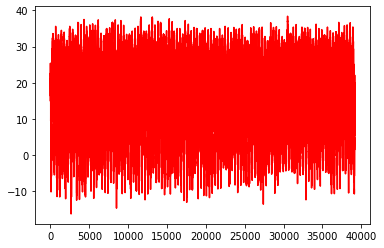

In [109]:
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)
result = []

for row in data:
    if row[-1] != '':
        result.append(float(row[-1]))

plt.plot(result, 'r')
plt.show()

4만개에 달하는 갯수의 데이터를 모두 그리면 어떤 의미인지 파악할수가 없다.

### 3) 날짜 데이터 추출하기

split()은 사용자가 설정하는 특정 기준으로 문자열을 분리한다. 사용자가 지정한 문자가 없다면 공백 문자를 기분으로 문자를 분리한다.

In [76]:
s = 'hello python'
print(s.split())

['hello', 'python']


In [77]:
date = '1907-10-01'
print(date.split('-'))

['1907', '10', '01']


Split() 함수를 이용해 위에서 알아보기 힘들었던 데이터 중 8월의 데이터만 그래프로 그려본다.

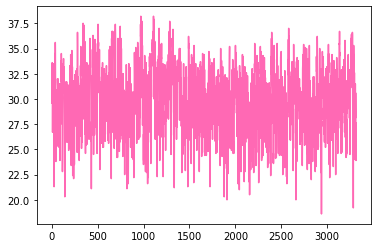

In [111]:
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)
result = []

for row in data:
    if row[-1] != '':
        if row[0].split('-')[1] == '08':
            result.append(float(row[-1]))

plt.plot(result, 'hotpink')
plt.show()

여전히 데이터가 많으므로 매년 2월 14일의 최고 기온 데이터만을 추출해본다.

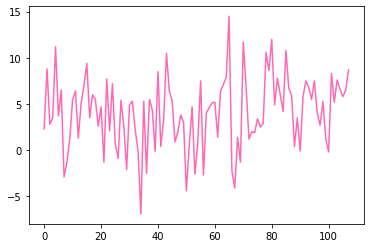

In [113]:
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)
result = []

for row in data:
    if row[-1] != '':
        if row[0].split('-')[1] == '02' and row[0].split('-')[2] == '14':
            result.append(float(row[-1]))

plt.plot(result, 'hotpink')
plt.show()

특정한 날을 기준으로 추출해보면 데이터가 100개 이상 존재한다는 걸 알 수 있다. 지난 100년간 2월 14일의 온도는 점차 높아진 것으로 분석된다.<br><br>
조금 더 자세히 살펴보기 위해 983년 이후 데이터만 추출하여 그래프로 나타내보자. 이 때, 최저 기온과 최고 기온을 따로 저장하여 두 개의 그래프를 그려본다.

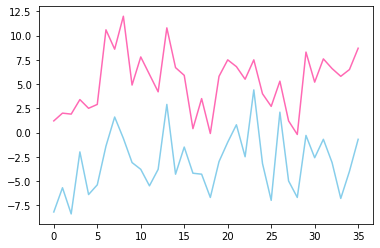

In [114]:
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)
high = []
low = []

for row in data:
    if row[-1] != '' and row[-2] != '':
        # 최고 기온 값과 최저 기온 값이 존재하는 행들만을 데이터로 뽑아낸다.
        if 1983 <= int(row[0].split('-')[0]): 
            #1983 이후 데이터만을 데이터로 뽑아낸다.
            if row[0].split('-')[1] == '02' and row[0].split('-')[2] == '14':
                high.append(float(row[-1]))
                low.append(float(row[-2]))
                #최저 기온과 최고 기온을 따로 저장한다.

plt.plot(high, 'hotpink')
plt.plot(low, 'skyblue')
plt.show()

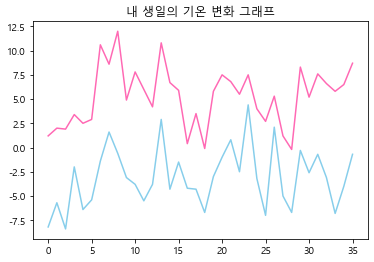

In [135]:
f = open('seoul.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)
high = []
low = []

for row in data:
    if row[-1] != '' and row[-2] != '':
        # 최고 기온 값과 최저 기온 값이 존재하는 행들만을 데이터로 뽑아낸다.
        if 1983 <= int(row[0].split('-')[0]): 
            #1983 이후 데이터만을 데이터로 뽑아낸다.
            if row[0].split('-')[1] == '02' and row[0].split('-')[2] == '14':
                high.append(float(row[-1]))
                low.append(float(row[-2]))
                #최저 기온과 최고 기온을 따로 저장한다.

plt.plot(high, 'hotpink')
plt.plot(low, 'skyblue')
plt.rcParams['axes.unicode_minus'] = False 
# 기호 - 마이너스가 깨져보이는 걸 보완해주는 코드

plt.title('내 생일의 기온 변화 그래프')
plt.show()

In [ ]:
# 평균 기온이 상승하고 있음을 알 수 있는 그래프는 어떻게 표현할까? 
#
# f = open('seoul.csv', 'r', encoding='cp949')
# data = csv.reader(f, delimiter=',')
# header = next(data)
# high = []
# low = []
# average = []

# for row in data:
#     if row[-1] != '' and row[-2] != '':
#         startyear = int(row[0].split('-')[0]);
#         if startyear == int(row[0].split('-')[0]):
#             high.append(float(row[-1]))
#             low.append(float(row[-2]))
#         average.append((sum(low))/len(high))

# plt.plot(average, 'skyblue')
        
# # plt.plot(high, 'hotpink')
# # plt.plot(low, 'skyblue')
# plt.show()

### 4) 기본 데이터를 다양하게 시각화하기
#### (1) 히스토그램 
 - hist() 함수
 히스토그램은 자료의 분포 상태를 직사각형 모양의 막대 그래프로 나타낸다.<br>

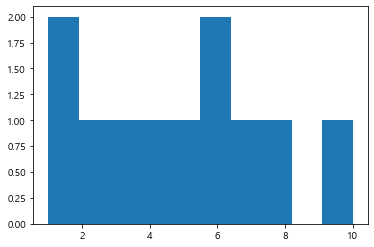

In [136]:
plt.hist([1,1,2,3,4,5,6,6,7,8,10])
plt.show()

 - 주사위 시뮬레이션

In [137]:
import random
print(random.randint(1,6))

2


In [139]:
dice = []
for i in range(5):
    dice.append(random.randint(1,6))
print(dice)

[5, 4, 6, 4, 6]


bins 옵션은 가로축의 구간 개수를 설정하는 속성이다.

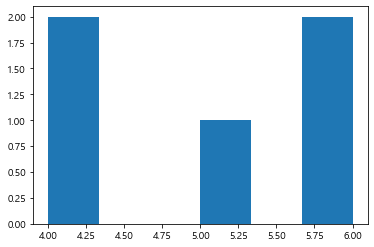

In [141]:
plt.hist(dice, bins=6)
plt.show()

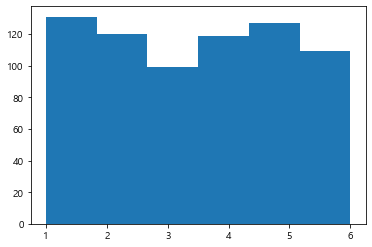

In [148]:
for i in range(100):
    dice.append(random.randint(1,6))
plt.hist(dice, bins=6)
plt.show()

빈도수가 높아질수록 확률은 거의 1/6씩에 가까워진다.

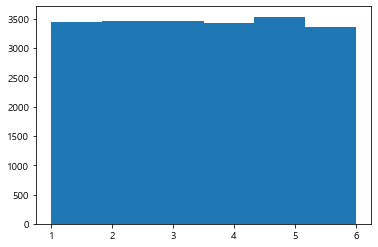

In [150]:
for i in range(10000):
    dice.append(random.randint(1,6))
plt.hist(dice, bins=6)
plt.show()

#### (2) 기온 데이터를 히스토그램으로 표현하기

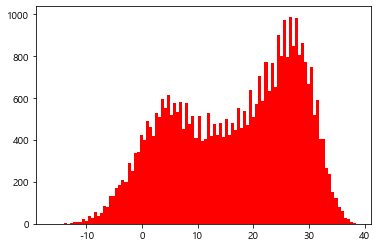

In [152]:
f = open('seoul.csv')
data = csv.reader(f)
next(data)
result = []

for row in data:
    if row[-1] != '':
        result.append(float(row[-1]))

plt.hist(result, bins=100, color='r')
plt.show()

 - 8월의 데이터만 뽑아서 다시 히스토그램으로 표현하기

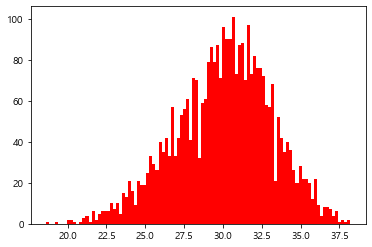

In [160]:
f = open('seoul.csv')
data = csv.reader(f)
next(data)
aug = []

for row in data:
    month = row[0].split('-')[1]
    if row[-1] != '':
        if month == '08':
            aug.append(float(row[-1]))

plt.hist(aug, bins=100, color='r')
plt.show()

 - 1월과 8월의 데이터를 히스토그램으로 시각화하기

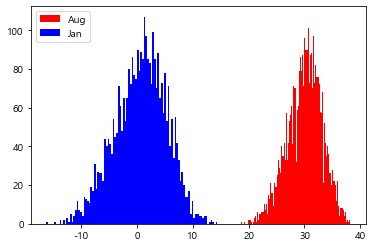

In [162]:
f = open('seoul.csv')
data = csv.reader(f)
next(data)
aug = []
jan = []

for row in data:
    month = row[0].split('-')[1]
    if row[-1] != '':
        if month == '08':
            aug.append(float(row[-1]))
        if month == '01':
            jan.append(float(row[-1]))

plt.hist(aug, bins=100, color='r', label='Aug')
plt.hist(jan, bins=100, color='b', label='Jan')
plt.legend()
plt.show()

#### (3) 기온 데이터를 상자 그림으로 표현하기
상자그림은 가장 끝 값과 가장 최솟값이 위 아래의 끝을 이루고 있으며 상자의 윗 부분은 3/4값, 중간의 빨간 선 부분은 2/4값, 상자의 아래 부분은 1/4값으로 이루어져 있다.

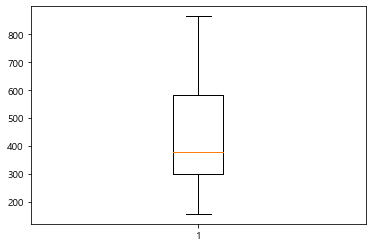

In [163]:
f = open('seoul.csv')
data = csv.reader(f)
next(data)
result = []

for i in range(13):
    result.append(random.randint(1, 1000))

plt.boxplot(result)
plt.show()

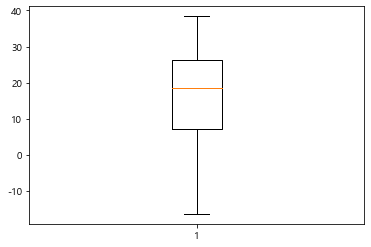

In [164]:
f = open('seoul.csv')
data = csv.reader(f)
next(data)
result = []

for row in data:
    if row[-1] != '':
        result.append(float(row[-1]))

plt.boxplot(result)
plt.show()

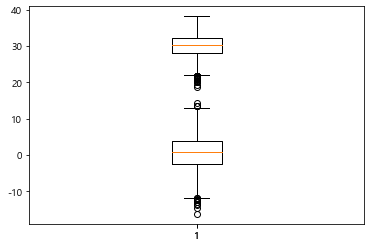

In [166]:
f = open('seoul.csv')
data = csv.reader(f)
next(data)
aug = []
jan = []

for row in data:
    month = row[0].split('-')[1]
    if row[-1] != '':
        if month == '08':
            aug.append(float(row[-1]))
        if month == '01':
            jan.append(float(row[-1]))

plt.boxplot(aug)
plt.boxplot(jan)
plt.show()

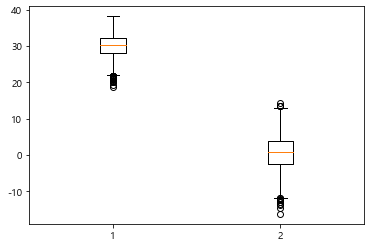

In [167]:
f = open('seoul.csv')
data = csv.reader(f)
next(data)
aug = []
jan = []

for row in data:
    month = row[0].split('-')[1]
    if row[-1] != '':
        if month == '08':
            aug.append(float(row[-1]))
        if month == '01':
            jan.append(float(row[-1]))

plt.boxplot([aug, jan])
plt.show()

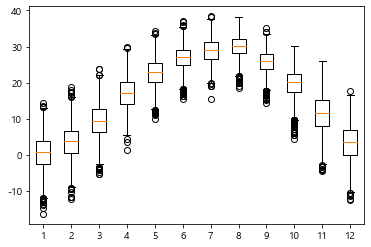

In [168]:
f = open('seoul.csv')
data = csv.reader(f)
next(data)
month = [[],[],[],[],[],[],[],[],[],[],[],[]]

for row in data:
    if row[-1] != '':
        month[int(row[0].split('-')[1])-1].append(float(row[-1]))
                                                  
plt.boxplot(month)
plt.show()

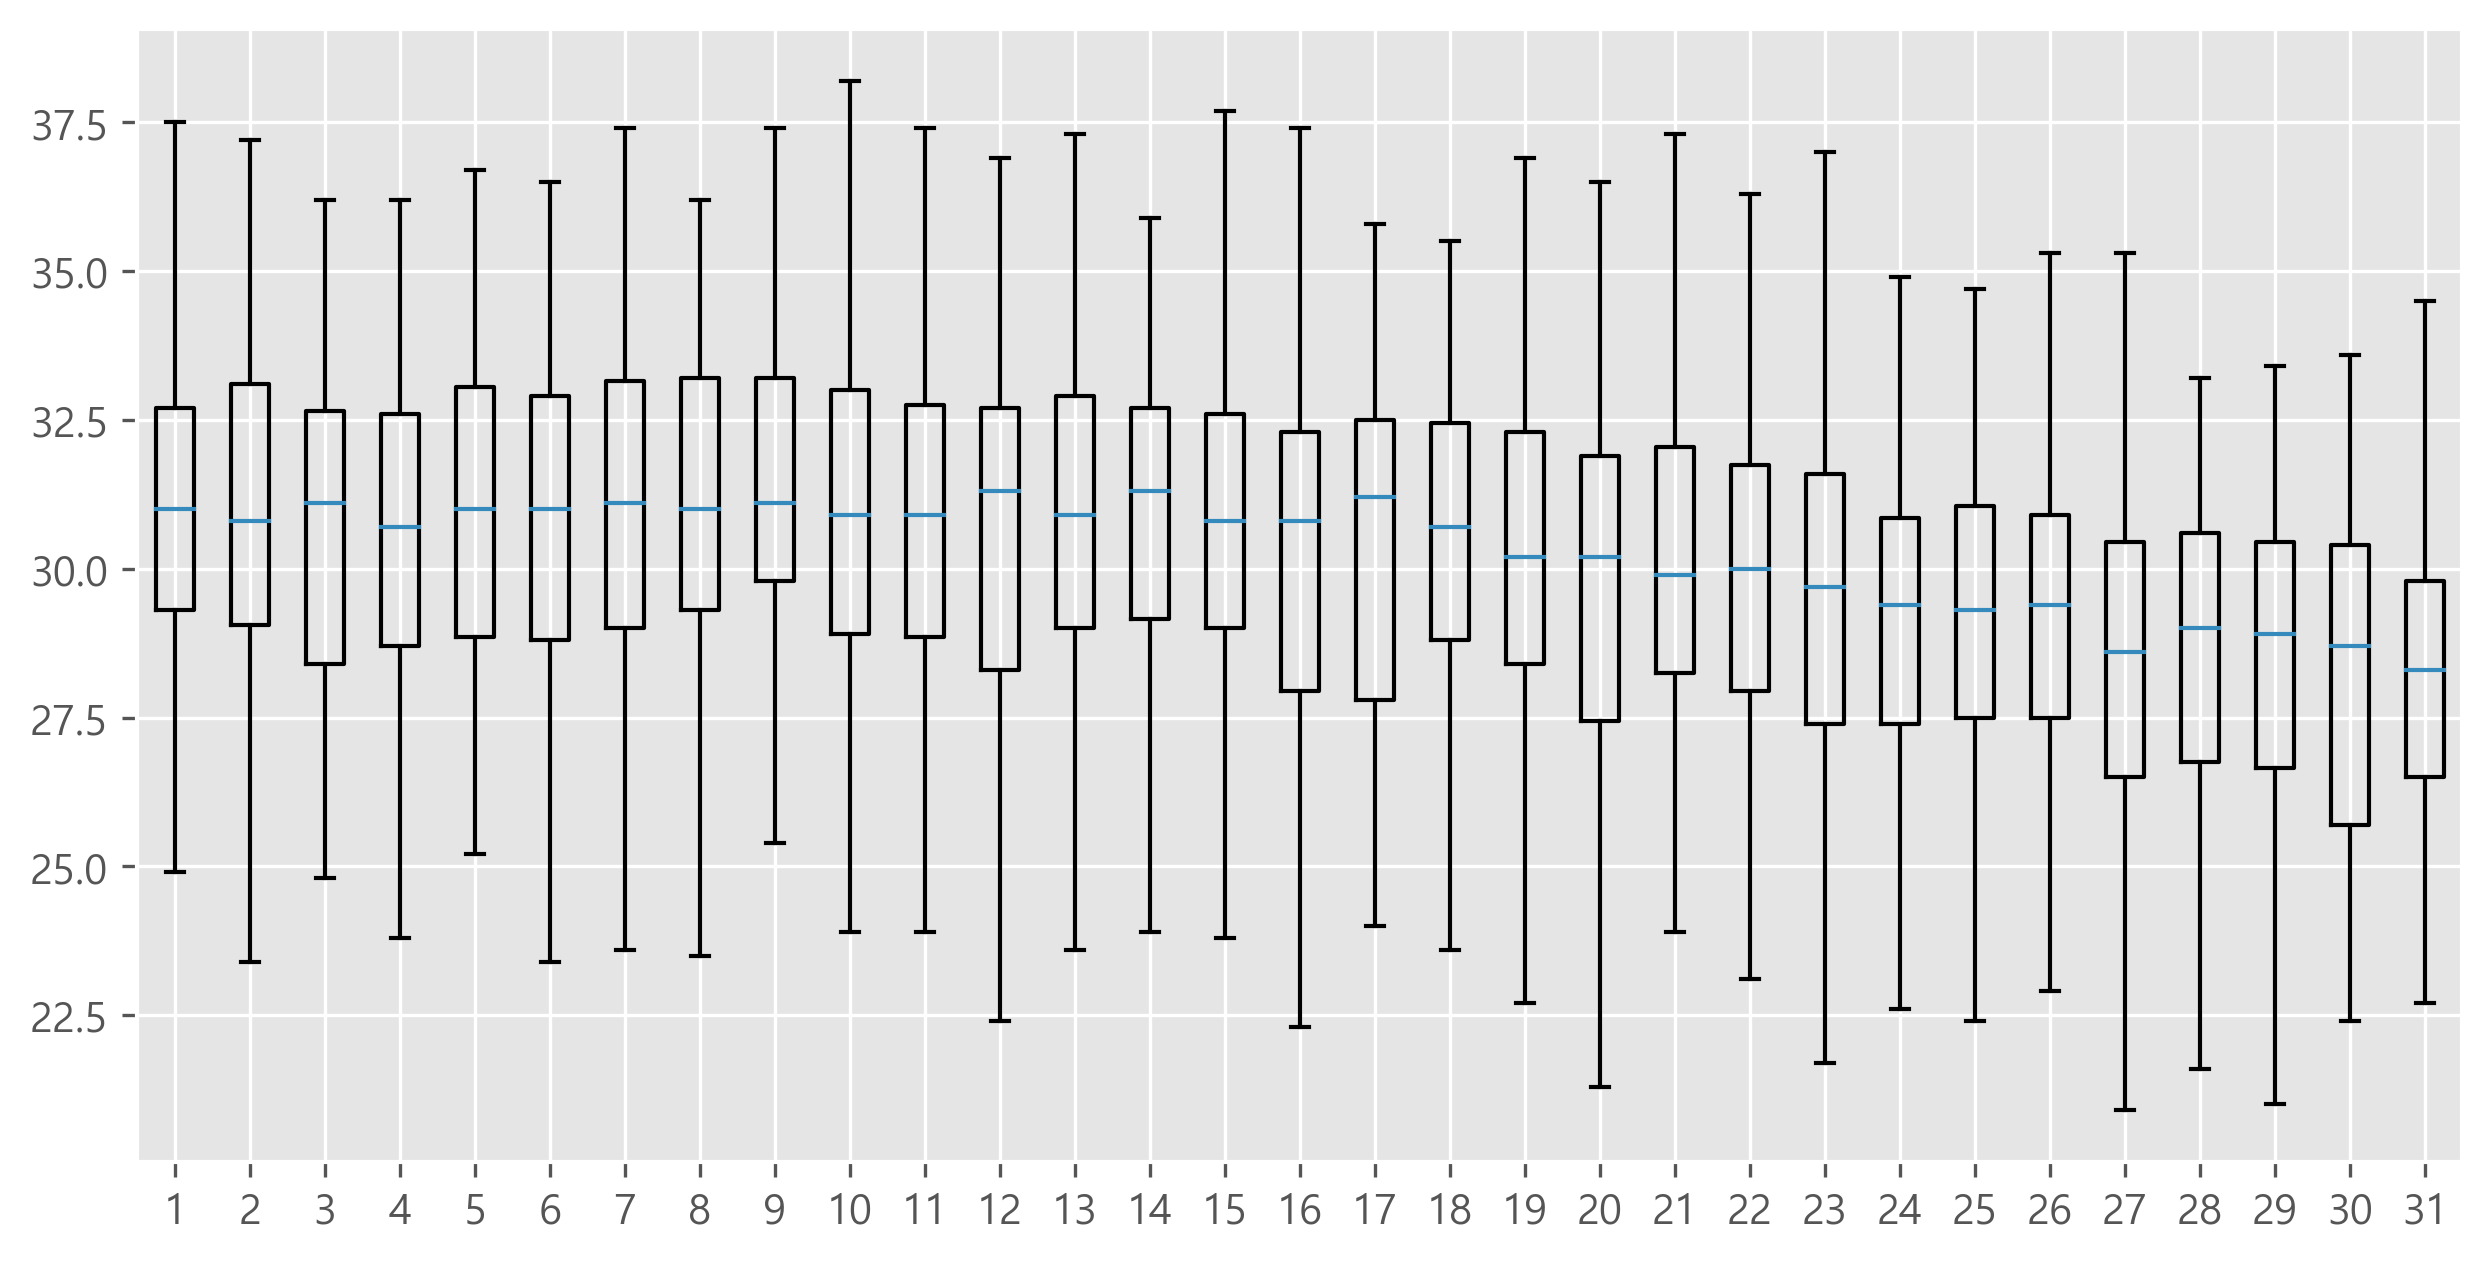

In [170]:
f = open('seoul.csv')
data = csv.reader(f)
next(data)
day = []
for i in range(31):
    day.append([])

for row in data:
    if row[-1] != '':
        if row[0].split('-')[1] == '08':
            day[int(row[0].split('-')[2])-1].append(float(row[-1]))
                
plt.style.use('ggplot') # 그래프 스타일 지정
plt.figure(figsize=(10,5), dpi=300) # 그래프 크기 수정
plt.boxplot(day, showfliers=False) # 아웃라이어 값 생략
plt.show()